In [86]:
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.common.by import By
from tqdm import tqdm
import time
import json
import requests

In [87]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")

# options.add_argument("--headless")

options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options)

stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )

In [93]:
with open('data.json', 'r') as f:
    data = json.load(f)

In [96]:
for k, v in tqdm(data.copy().items()):
    url = f'https://explorer.multiversx.com/nfts/{k}'
    driver.get(url)
    time.sleep(1)
    for row in driver.find_elements(By.CLASS_NAME, 'detail-item'):
        l = row.text.split('\n')
        if l[0] == 'Nonce':
            data[k]['nonce'] = int(l[1])
        if l[0] == 'Assets':
            data[k]['metadata'] = l[2]
            data[k]['dynamic'] = l[3]

100%|██████████| 162/162 [05:04<00:00,  1.88s/it]


In [97]:
with open('data.json', 'w') as f:
    json.dump(data, f, indent=4)

In [102]:
for k, v in tqdm(data.copy().items()):
    if data[k].get('nonce') is None:
        continue
    if data[k].get('metadata_dict') is not None:
        continue
    else:
        time.sleep(1)
        r = requests.get(data[k]['metadata'])
        data[k]['metadata_dict'] = r.json()
    if data[k].get('dynamic_dict') is not None:
        continue
    else:
        time.sleep(1)
        r = requests.get(data[k]['dynamic'])
        data[k]['dynamic_dict'] = r.json()

100%|██████████| 162/162 [02:45<00:00,  1.02s/it]


In [108]:
import matplotlib.pyplot as plt

In [126]:
l = []
for k, v in data.items():
    try:
        price = v['price']
        level = v['dynamic_dict']['starLevel']
        weapon = v['metadata_dict']['name']
        code = k
        l.append((price, level, weapon, code))
    except:
        print(k)

CRWEAPONS-e5ab49-05e4
CRWEAPONS-e5ab49-05bb


In [127]:
l = [i for i in l if i[0] < 1.5]

In [130]:
[x for x in l if x[1] == 3]

[(1.0, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-07c3'),
 (1.0, 3, 'Tesla Gun X', 'CRWEAPONS-e5ab49-0628'),
 (1.1, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-06aa'),
 (1.1, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-031c'),
 (1.35, 3, 'Blaster-X', 'CRWEAPONS-e5ab49-076a'),
 (1.35, 3, 'Tesla Gun X', 'CRWEAPONS-e5ab49-06b0'),
 (1.45, 3, 'Blaster-X', 'CRWEAPONS-e5ab49-04c6')]

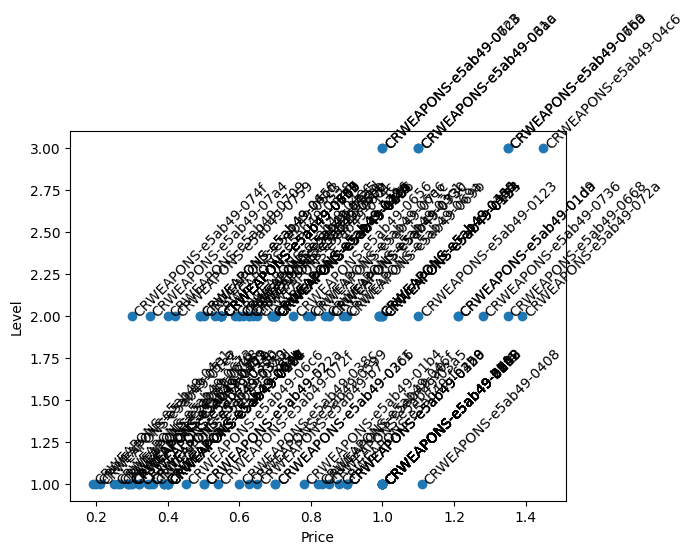

In [128]:
plt.scatter([x[0] for x in l], [x[1] for x in l])
plt.xlabel('Price')
plt.ylabel('Level')
# label dot with code with angolo 45 degree
for i in l:
    plt.annotate(i[3], (i[0], i[1]), rotation=45)
plt.show()

In [79]:
for x in l:
    if x[1] > 17:
        print(x)

(1.0, 20, 'Mortar Gun X', 'CRWEAPONS-e5ab49-07c3')
